# 测试

## 测试bar

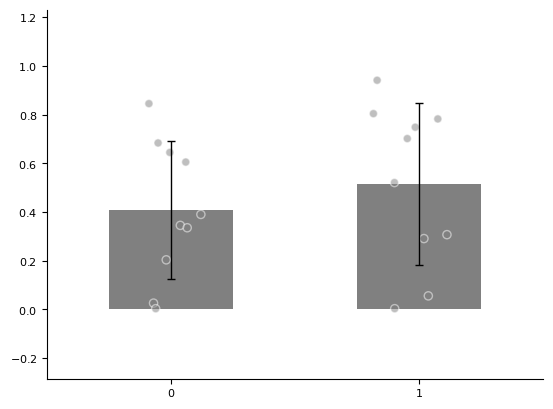

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import plot_one_group_bar_figure

data1 = np.random.rand(10)
data2 = np.random.rand(10)

fig, ax = plt.subplots()
ax = plot_one_group_bar_figure([data1, data2], ax=ax)

## 测试brain_surface

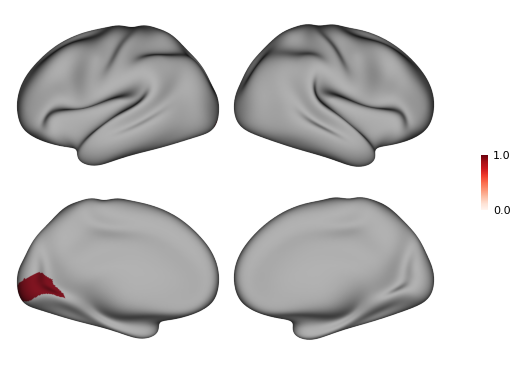

In [2]:
from plotfig import plot_brain_surface_figure

plot_data = {"lh_V1": 1}

ax = plot_brain_surface_figure(plot_data)

## 测试brain_connection

In [ ]:
import numpy as np


def generate_sparse_connectome_v1(size: int = 31, sparsity: float = 0.9, seed=None):
    """
    生成稀疏对称矩阵

    Parameters:
    size: 矩阵大小
    sparsity: 稀疏度，0表示没有0元素，1表示全部为0元素
    """
    if seed is not None:
        np.random.seed(seed)
    # 生成随机矩阵
    connectome = np.random.rand(size, size)

    # 应用稀疏度 - 随机将一些元素设为0
    mask = np.random.rand(size, size) < sparsity
    connectome[mask] = 0

    # 确保矩阵对称
    connectome = np.triu(connectome) + np.triu(connectome, 1).T

    # 确保对角线为0
    np.fill_diagonal(connectome, 0)

    return connectome


def generate_sparse_connectome_v2(
    size: int = 31, density: float = 0.1, seed: int | None = None
) -> np.ndarray:
    """
    生成一个对称的方阵，满足：
    - 对角线为0
    - 有正负值
    - 稀疏程度由 density 控制（非零元素比例）

    参数:
        size: 方阵大小（行列数）
        density: 非零元素比例，0~1，越小越稀疏
        seed: 随机种子，方便复现

    返回:
        np.ndarray 方阵
    """
    if seed is not None:
        np.random.seed(seed)

    # 先生成上三角（不含对角线）随机稀疏矩阵
    upper = np.random.choice(
        [0, 1], size=(size, size), p=[1 - density, density]
    ) * np.random.uniform(-1, 1, size=(size, size))

    # 让对角线为0
    np.fill_diagonal(upper, 0)

    # 只保留上三角部分（含对角线0）
    upper = np.triu(upper, k=1)

    # 下三角镜像上三角，保证对称
    mat = upper + upper.T

    return mat

In [ ]:
import numpy as np
from plotfig import plot_brain_connection_figure

lh_surfgii_file = (
    r"e:\6_Self\plot_self_brain_connectivity\103818.L.midthickness.32k_fs_LR.surf.gii"
)
rh_surfgii_file = (
    r"e:\6_Self\plot_self_brain_connectivity\103818.R.midthickness.32k_fs_LR.surf.gii"
)
niigz_file = (
    r"e:\6_Self\plot_self_brain_connectivity\human_Self_processing_network.nii.gz"
)
output_file = r"E:\git_repositories\plotfig\tests\test.html"

connectome = generate_sparse_connectome_v1(seed=42)
# connectome = generate_sparse_connectome_v2(seed=42)
# print(np.max(connectome), np.min(connectome))

fig = plot_brain_connection_figure(
    connectome,
    lh_surfgii_file=lh_surfgii_file,
    rh_surfgii_file=rh_surfgii_file,
    niigz_file=niigz_file,
    line_color="green",
    scale_method="width_color",
)

In [ ]:
from plotfig import save_brain_connection_frames

save_brain_connection_frames(fig, "E:/git_repositories/plotfig/tests/figures/brain_connec_frames")

## test molten

In [1]:
a = 1
b = 2

In [2]:
print(a)
print(b)

1
2
